# Analyzing the Data in Ford's GoBike Program

**Investigation Overview**

In this investigation, we'll be taking a look at the data for Ford's GoBike program, with the data kindly provided to us by Udacity. Transparently, there aren't a ton of quantitative fields in this dataset, so we'll do our best to make the most of it and have some fun along the way.

# Importing packages

In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb



# Gathering data

In [43]:
bike_df = pd.read_csv('fordgobike_tripdata.csv')
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
bike_df.shape

(183412, 16)

In [6]:
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
bike_df.duplicated().sum()

0

# Observations:

**-Drop columns which are not useful for the analysis.**

**-Change the data types which are wrong.**


In [8]:
bike_df_clean = bike_df.copy()

In [9]:
bike_df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [10]:
bike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [11]:
bike_df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [12]:
#removing columns which are not useful for analysis
columns= ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude' ,'start_station_id','end_station_id']
bike_df_clean.drop(columns, axis=1, inplace=True)
bike_df_clean.head()


,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


In [13]:
bike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_name       183215 non-null  object 
 4   end_station_name         183215 non-null  object 
 5   bike_id                  183412 non-null  int64  
 6   user_type                183412 non-null  object 
 7   member_birth_year        175147 non-null  float64
 8   member_gender            175147 non-null  object 
 9   bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 14.0+ MB


In [14]:
#Fixing columns that have wrong data types
bike_df_clean['start_time'] = bike_df_clean['start_time'].astype('datetime64[ns]')
bike_df_clean['end_time'] = bike_df_clean['end_time'].astype('datetime64[ns]')
bike_df_clean['bike_id'] = bike_df_clean['bike_id'].astype(str)
bike_df_clean['user_type'] = bike_df_clean['user_type'].astype('category')
bike_df_clean['member_gender'] = bike_df_clean['member_gender'].astype('category')
bike_df_clean['member_birth_year'] = bike_df_clean['member_birth_year'].astype(object)

In [15]:
bike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_name       183215 non-null  object        
 4   end_station_name         183215 non-null  object        
 5   bike_id                  183412 non-null  object        
 6   user_type                183412 non-null  category      
 7   member_birth_year        175147 non-null  object        
 8   member_gender            175147 non-null  category      
 9   bike_share_for_all_trip  183412 non-null  object        
dtypes: category(2), datetime64[ns](2), int64(1), object(5)
memory usage: 11.5+ MB


In [16]:
#As our data set is from 2019 we'll be subtracting thier birthyear from 2019.
bike_df_clean['member_age'] = 2019 - bike_df_clean['member_birth_year']

In [17]:
bike_df_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,35
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,45


# Univariate Exploration

# Average bike trip duration

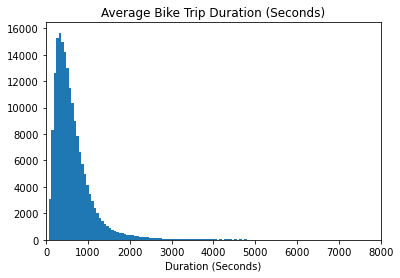

In [18]:

bin_edges = np.arange(0, bike_df_clean['duration_sec'].max() + 100 , 60)
plt.hist(data = bike_df_clean , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,8000)
plt.title('Average Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)');

so there are maximum 140000 bike trip held for an average 700 seconds.So we can see that the users use bike for almost 10-12 min .

# Subscriber vs Customer

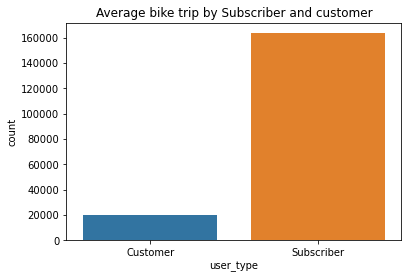

In [19]:
sb.countplot(data=bike_df_clean,x='user_type')
plt.title('Average bike trip by Subscriber and customer');

From above observation we can see that the most of the customers are subscribers.

# Number of rides by hours of the day

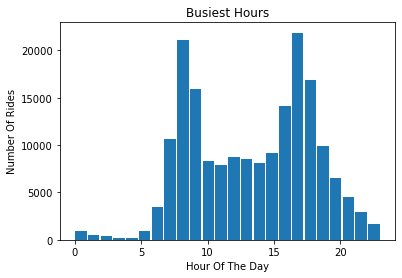

In [20]:
#Distribution of number of rides by hours of the day
data = bike_df_clean['start_time'].dt.hour
plt.hist(data,rwidth=.9, bins = 24)
plt.title('Busiest Hours')
plt.xlabel('Hour Of The Day')
plt.ylabel('Number Of Rides');

We can see that the most busiest hour is fistly between in the morning time which is 7am-10am when everyone is goint to work and then in the evening when people are coming back to home after work which is between 6pm-8pm.

# Number of rides based on the age

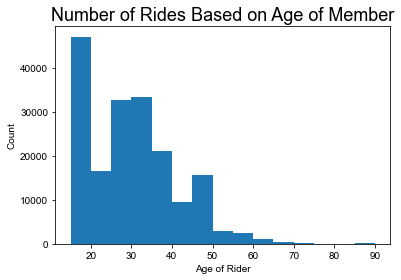

In [21]:
age_bins = np.arange(15, 90+5, 5)
plt.hist(data = bike_df_clean, x = 'member_age', bins = age_bins);
plt.title('Number of Rides Based on Age of Member', fontsize = 18);
plt.xlabel('Age of Rider');
plt.ylabel('Count');
plt.style.use('seaborn');

People who rides mostly are of age between 20-40 age.We can conclude that as people's age increasing number of rides are less.Main users of the bike riders are of age between 20-40 age from young people uses bikes to go college and then the office going people uses bikes to go for their work place.So by analysis we can see that the subscribers in large number are of 20-40 age.

# Bivariate Exploration

# Duration of rides per day 

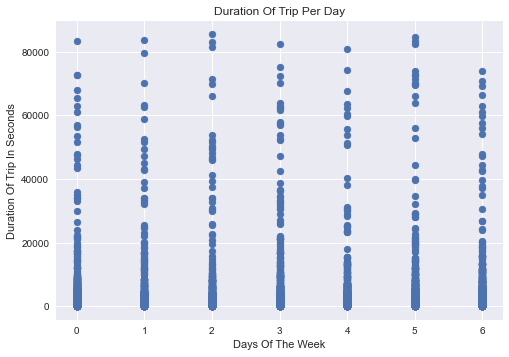

In [24]:
#Distribution of duration trips per day
bike_df_clean['daysofweek'] = bike_df_clean['start_time'].dt.dayofweek

plt.scatter(data = bike_df_clean , x = 'daysofweek' , y='duration_sec')
plt.title('Duration Of Trip Per Day')
plt.xlabel('Days Of The Week')
plt.ylabel('Duration Of Trip In Seconds');

 We can see that the observation shows almost all 7 days of a week people go and take rides.But we can also see that on wednesday more people take rides.Most of the customer are subscribers because the graph is almost same for all 7 days.

# Gender count on rides

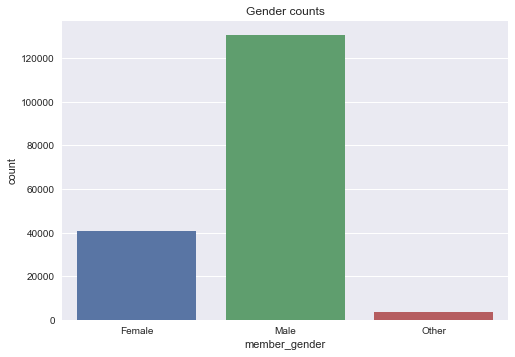

In [26]:
sb.countplot(data = bike_df_clean, x = 'member_gender')
plt.title('Gender counts');

From analysis we can see that the gender wise change in the bar graph, so the most number of bike users are male users around 12,000 and the female users are less around 4,000.

# Number of riders of different age.

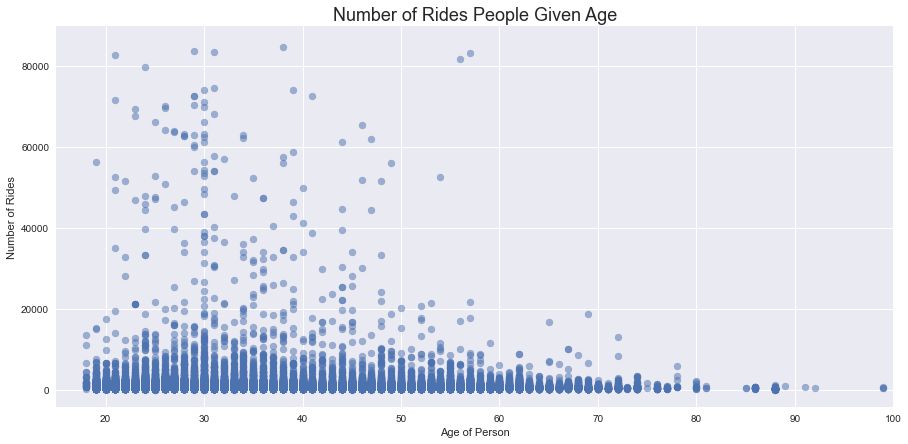

In [27]:

#Visualizing the data in a scatterplot
plt.figure(figsize = (15, 7))
plt.scatter(data = bike_df_clean, x = 'member_age', y = 'duration_sec', alpha = 0.5);
plt.xlim(15, 100)
plt.style.use('seaborn')
plt.title('Number of Rides People Given Age', fontsize = 18);
plt.xlabel('Age of Person');
plt.ylabel('Number of Rides');

After the observation we can see that 30 age people uses more bike rides than the other people.Poeple who are goes to work by riding bike are more of age between 20-40 so most of the people of this age ride bikes.

# Multivariate Exploration

# Distribution per trip in week by subscriber and customers

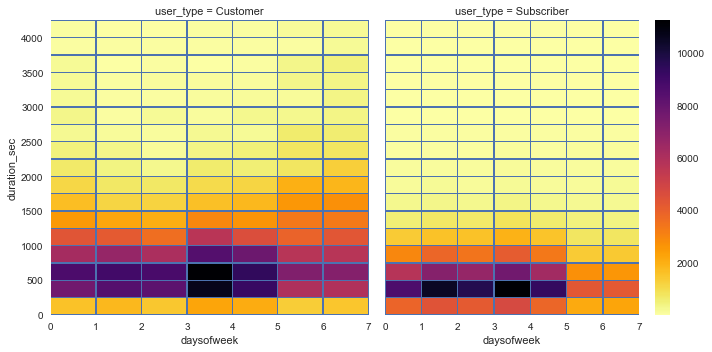

In [33]:
#Distribution of the duration per trip in the week by subscribers
xbin = np.arange(0,7+1,1)
ybin = np.arange(0,4200+250,250)

g = sns.FacetGrid (data = bike_df_clean , col='user_type', height=5)
g.map(plt.hist2d, 'daysofweek', 'duration_sec', cmin=0.5, cmap = 'inferno_r', bins=[xbin,ybin])
plt.colorbar();

From this heatmap we can similarities between customers and subscribers. We can see that both have an average of 4 and 12 min rides during the week. However customers are not only more present during the weekend they take longer trips as well.

# Which gender takes more rides compared to age

In [40]:
bike_df_clean.member_gender.unique()

['Male', NaN, 'Other', 'Female']
Categories (3, object): ['Male', 'Other', 'Female']

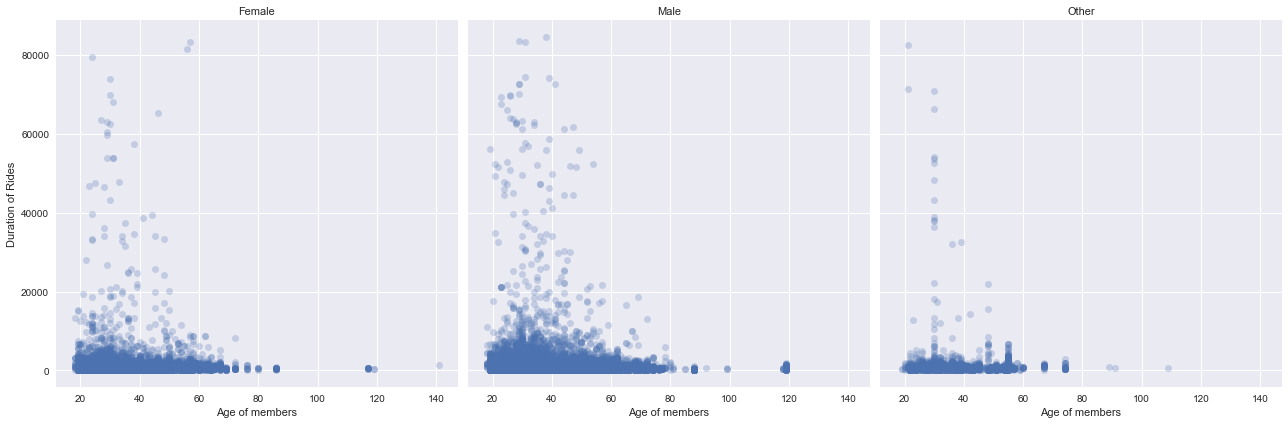

In [41]:
g = sns.FacetGrid(data = bike_df_clean, col = 'member_gender', height = 6,
                 col_wrap = 3)
g.map(sns.regplot, 'member_age', 'duration_sec', y_jitter = 0.04, fit_reg = False,
      scatter_kws = {'alpha' : 1/4})
g.set_ylabels('Duration of Rides')
g.set_xlabels('Age of members')
g.set_titles('{col_name}');


After observation we can see that there not so much different in the gender wise riding people.But according to age we can see that there is change in the graph in all of the gender graphs.